In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from biological_fuzzy_logic_networks.DREAM_analysis.utils import prepare_cell_line_data, cl_data_to_input
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet
from biological_fuzzy_logic_networks.utils import read_sif


In [2]:
data_folder = "/dccstor/ipc1/CAR/DREAM/"

In [3]:
nodes, edges = read_sif(f"{data_folder}DREAMdata/PKN_Alice.sif")

model = DREAMBioFuzzNet(nodes, edges)
model.remove_edges_from([('SERUM', 'SMAD23'), ('SERUM', 'AMPK')])

In [4]:
model.root_nodes

['SERUM', 'AMPK', 'SMAD23', 'EGF']

In [5]:
cl_data = prepare_cell_line_data(
        data_file=f"{data_folder}DREAMdata/ZR7530.csv",
        time_point=9)

(train_data,
valid_data,
train_inhibitors,
valid_inhibitors,
train_input,
valid_input,
train,
valid,
scaler,
        )= cl_data_to_input(
    data=cl_data,
    model=model,
    train_treatments=None,
    valid_treatments=None,
    train_cell_lines=None,
    valid_cell_lines=None,
    inhibition_value=1,
    minmaxscale=True,
    add_root_values=True,
    input_value=1,
    root_nodes=["EGF", "SERUM"]
)

['ZR7530']


/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, root_nodes] = input_value
/u/adr/Code/biological_fuzzy_logic_networks/biological_fuzzy_logic_networks/DREAM_analysis/utils.py:245: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  valid.loc[:, root_nodes] = input_value


In [6]:
train_input

{'SERUM': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 'AMPK': tensor([0.2704, 0.3077, 0.3513,  ..., 0.4081, 0.3231, 0.2928]),
 'SMAD23': tensor([0.2811, 0.0637, 0.3861,  ..., 0.4860, 0.2482, 0.3174]),
 'EGF': tensor([1., 1., 1.,  ..., 1., 1., 1.])}

In [7]:
n_epochs=1
learning_rate=0.1
batch_size=2000

In [8]:
loss, best_val_loss, loop_states = model.conduct_optimisation(
        input=train_input,
        valid_input=valid_input,
        ground_truth=train_data,
        valid_ground_truth=valid_data,
        train_inhibitors=train_inhibitors,
        valid_inhibitors=valid_inhibitors,
        epochs=n_epochs,
        learning_rate=learning_rate,
        batch_size=batch_size,
        checkpoint_path=None,
        convergence_check=False,
        logger=None,
    )

100%|██████████| 1/1 [09:13<00:00, 553.20s/it]


<AxesSubplot:xlabel='time', ylabel='loss'>

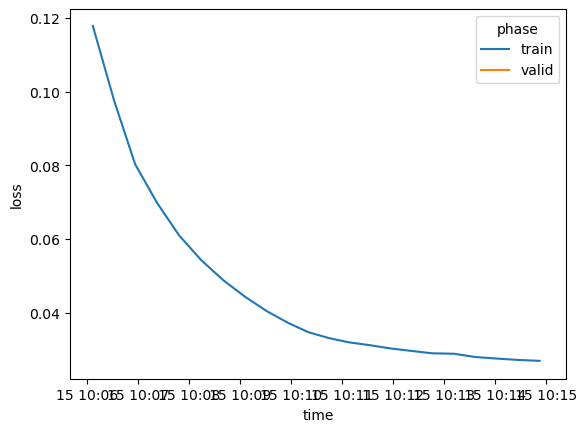

In [11]:
sns.lineplot(data=loss, x='time', y='loss', hue='phase')

In [13]:
output = pd.DataFrame(
            {k: v.numpy() for k, v in model.output_states.items()}
        )

In [14]:
output

,SERUM,NFkB,PLCg2,FAK,PI3K,BTK,PIP3,AKT_S473,p53,RB,...,MKK4,JNK,MAP3Ks,PAK,STAT5,EGF,MEK12,STAT1,STAT3,p70S6K
0,1.0,0.509974,0.411264,0.57155,0.633155,0.362102,0.625523,0.550981,0.170991,0.252491,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.393470
1,1.0,0.507114,0.411264,0.57155,0.633155,0.362102,0.625523,0.537670,0.170991,0.278844,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.374041
2,1.0,0.514419,0.411264,0.57155,0.633155,0.362102,0.625523,0.571478,0.170991,0.212173,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.423288
3,1.0,0.508847,0.411264,0.57155,0.633155,0.362102,0.625523,0.545750,0.170991,0.262805,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.385841
4,1.0,0.508337,0.411264,0.57155,0.633155,0.362102,0.625523,0.543372,0.170991,0.267510,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.382370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,1.0,0.512530,0.411264,0.57155,0.633155,0.362102,0.625523,0.562795,0.170991,0.229298,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.410672
14484,1.0,0.511676,0.411264,0.57155,0.633155,0.362102,0.625523,0.558857,0.170991,0.237025,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.404942
14485,1.0,0.506302,0.411264,0.57155,0.633155,0.362102,0.625523,0.533870,0.170991,0.286443,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.368482
14486,1.0,0.515515,0.411264,0.57155,0.633155,0.362102,0.625523,0.576491,0.170991,0.202119,...,0.474656,0.329483,0.158454,0.841527,0.24395,1.0,0.236224,0.247626,0.208828,0.430563


In [23]:
valid.columns

Index(['treatment', 'cell_line', 'time', 'cellID', 'fileID', 'b-catenin',
       'cleavedCas', 'CyclinB', 'GAPDH', 'IdU', 'Ki.67', '4EBP1', 'AKT_S473',
       'AKT_T308', 'AMPK', 'BTK', 'CREB', 'ERK12', 'FAK', 'GSK3B', 'H3',
       'p.HER2', 'JNK', 'MAP3Ks', 'MAPKAPK2', 'MEK12', 'MKK36', 'MKK4', 'NFkB',
       'p38', 'p53', 'p90RSK', 'PDPK1', 'PLCg2', 'RB', 'S6', 'p70S6K',
       'SMAD23', 'SRC', 'STAT1', 'STAT3', 'STAT5', 'inhibitor', 'EGF',
       'SERUM'],
      dtype='object')

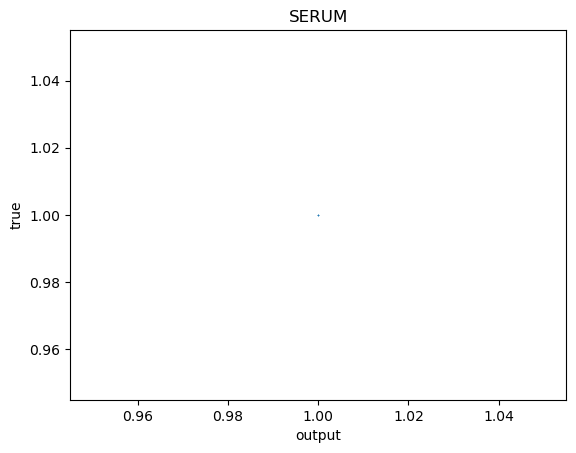

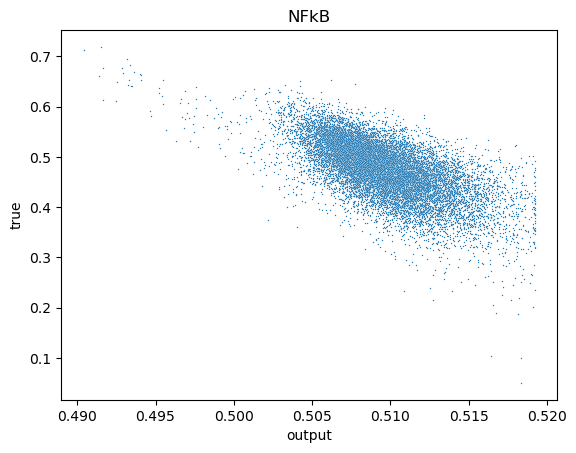

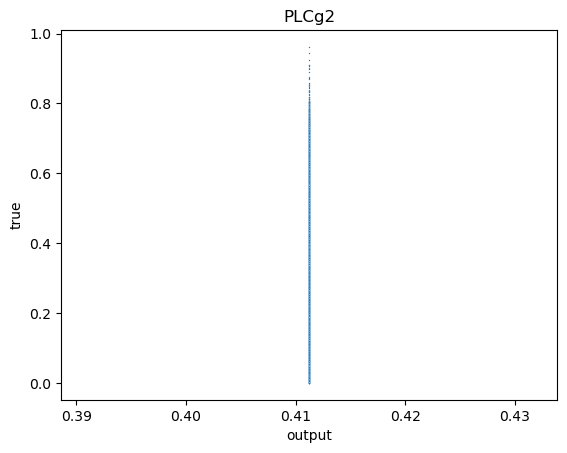

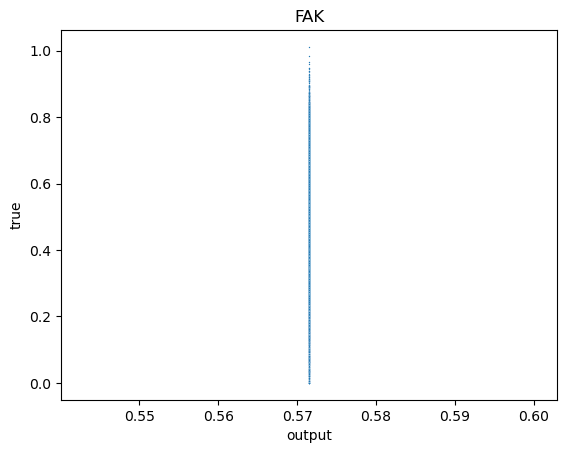

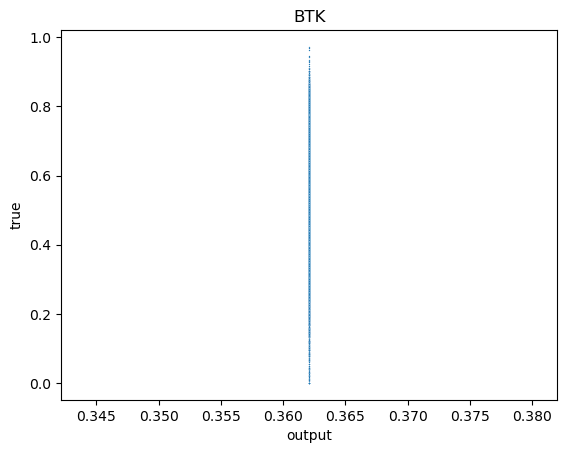

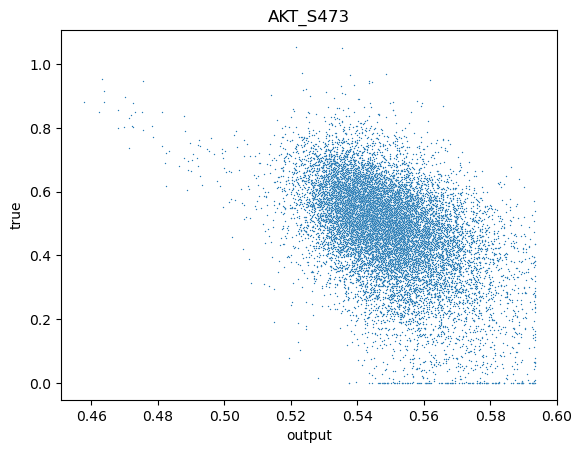

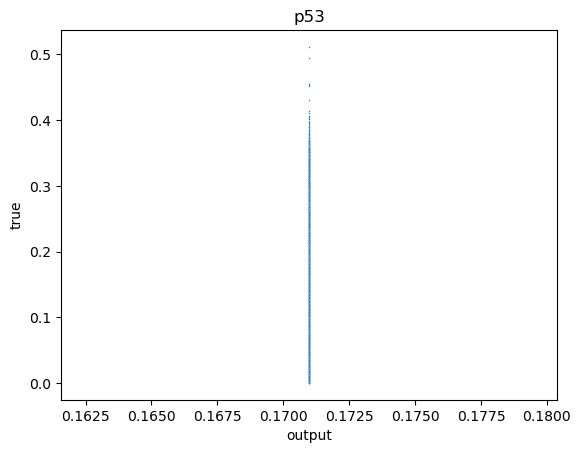

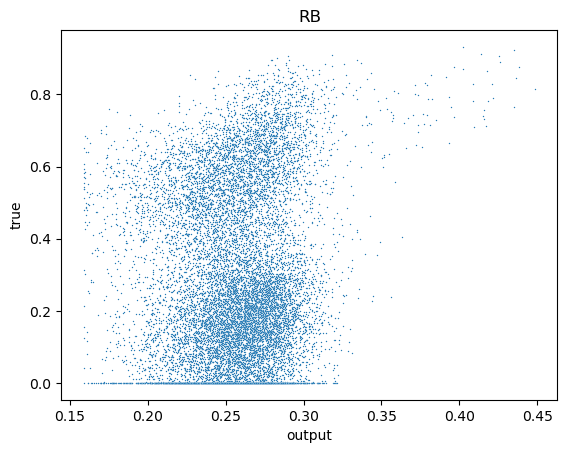

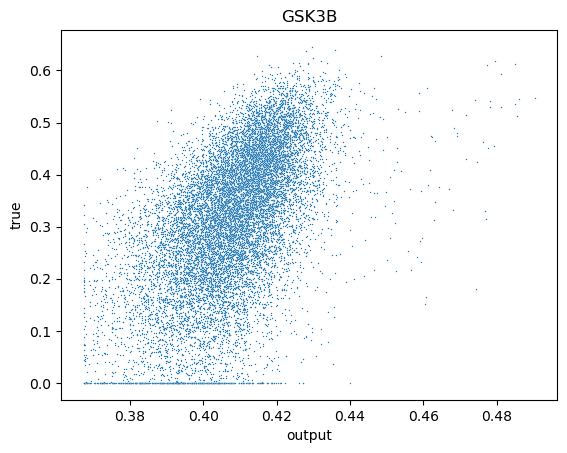

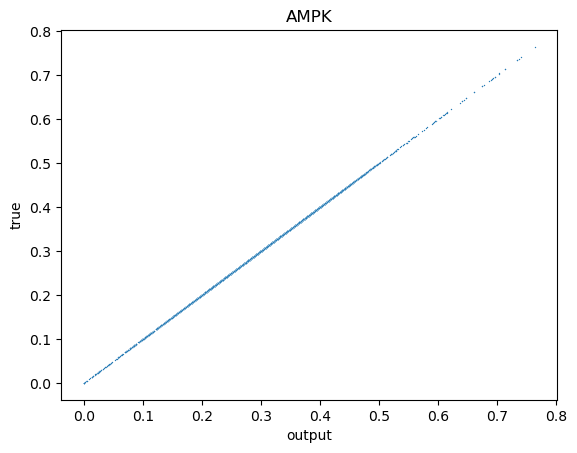

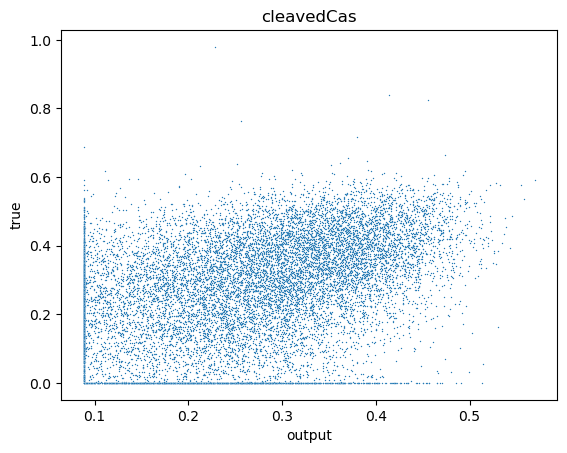

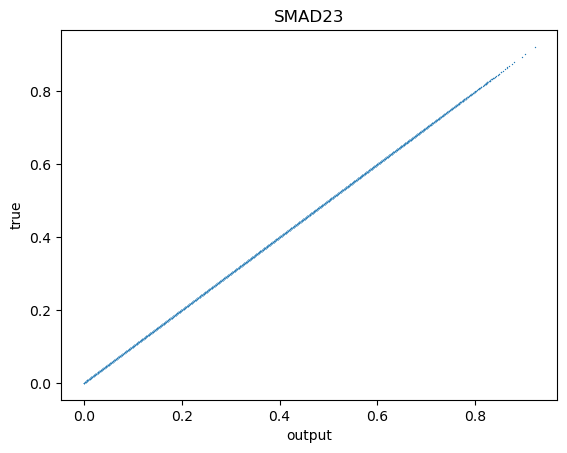

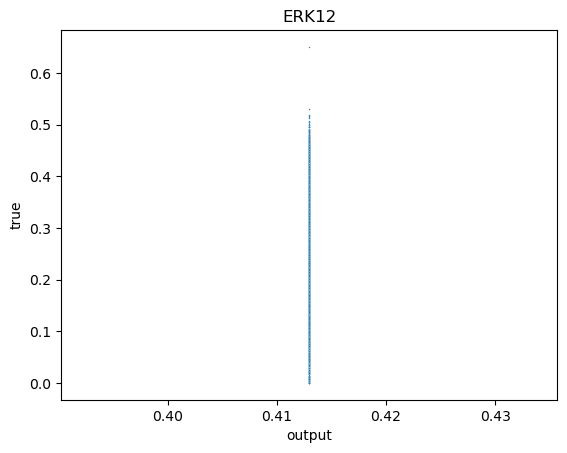

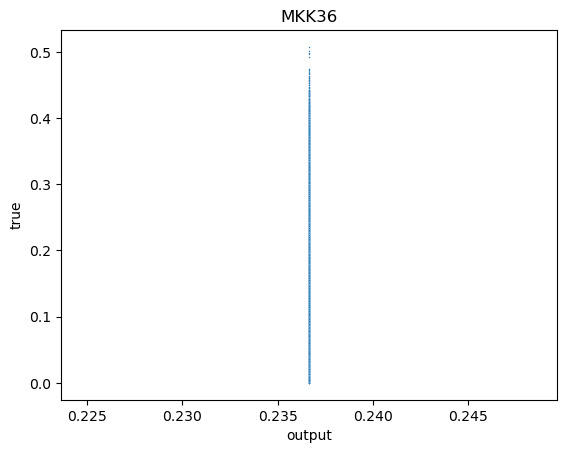

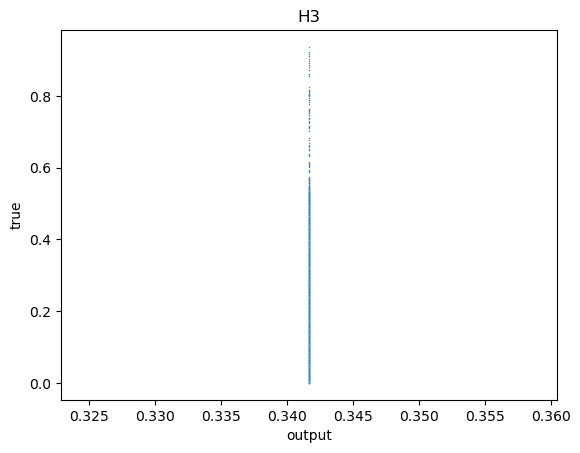

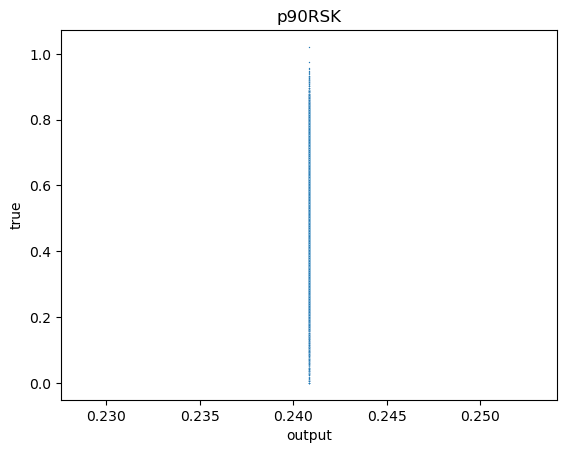

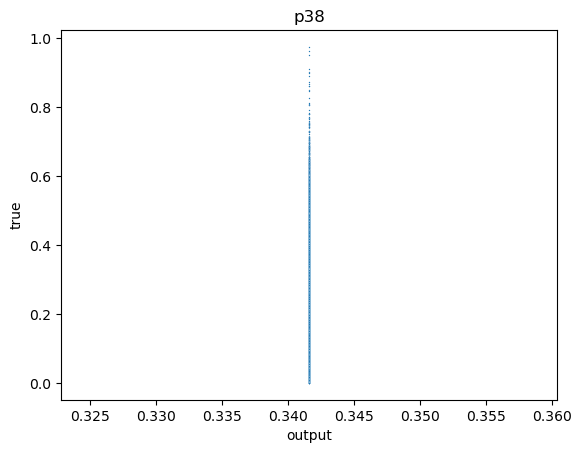

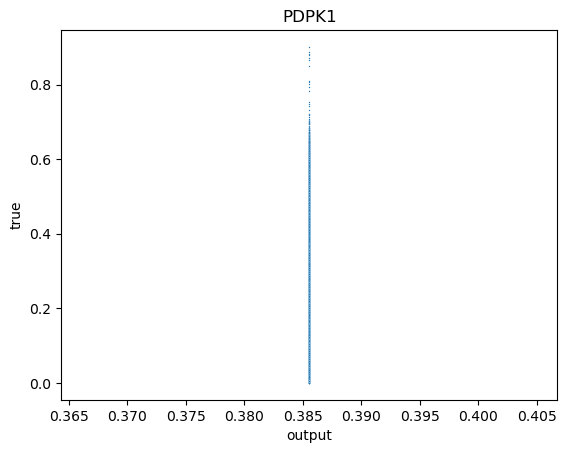

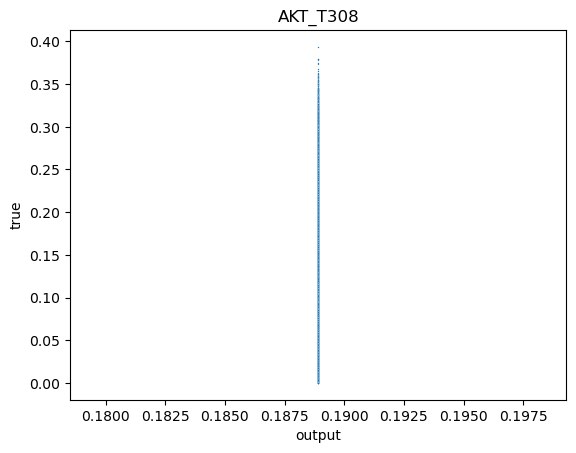

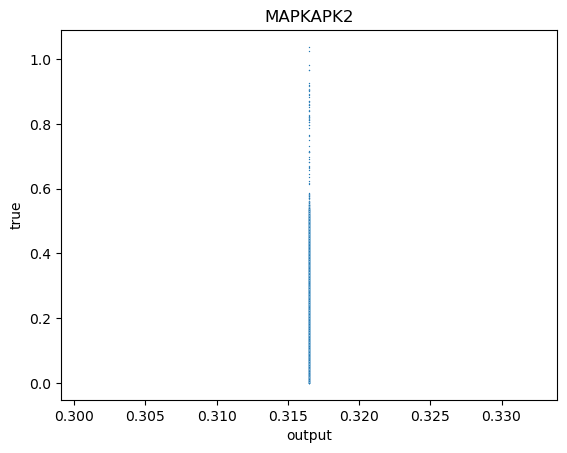

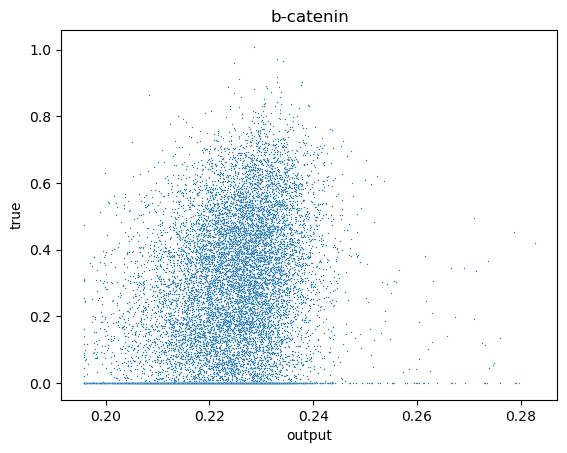

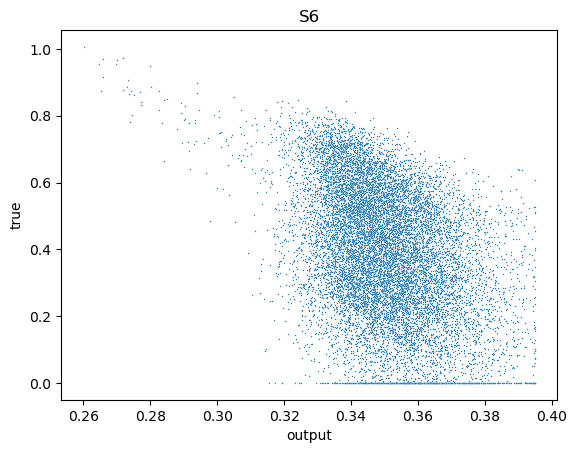

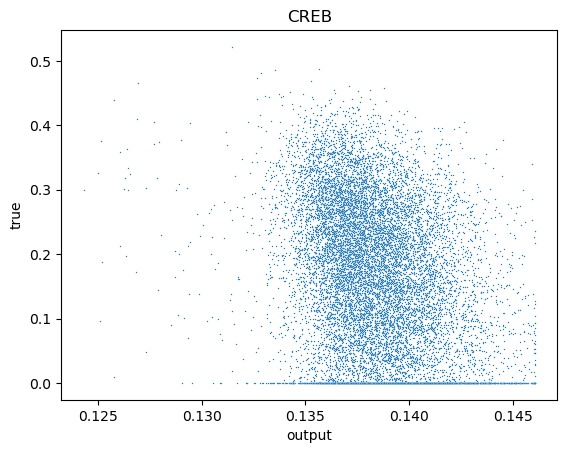

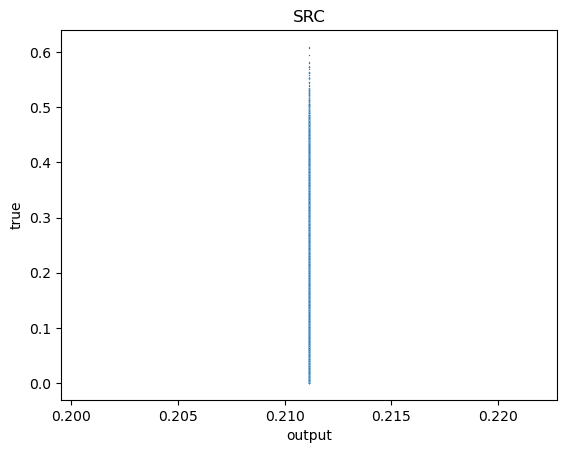

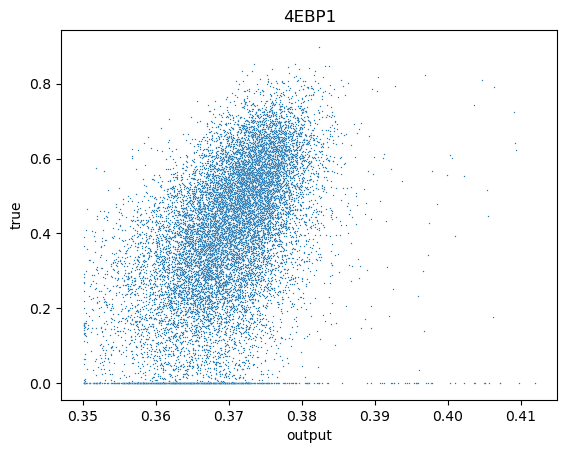

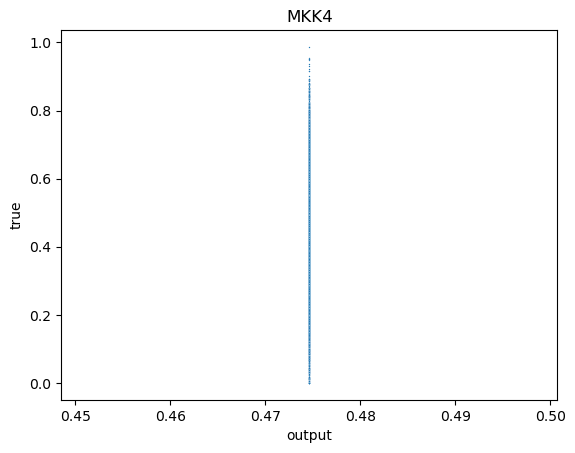

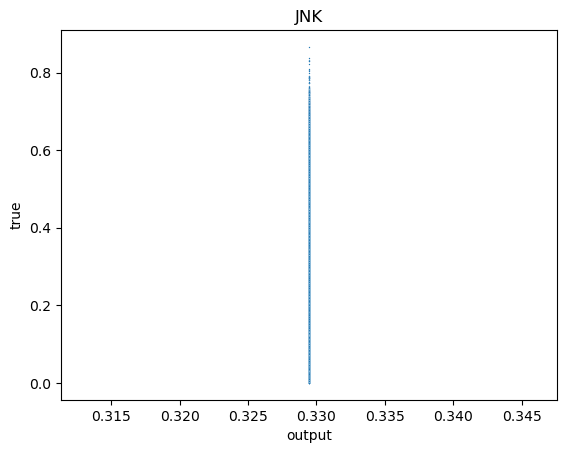

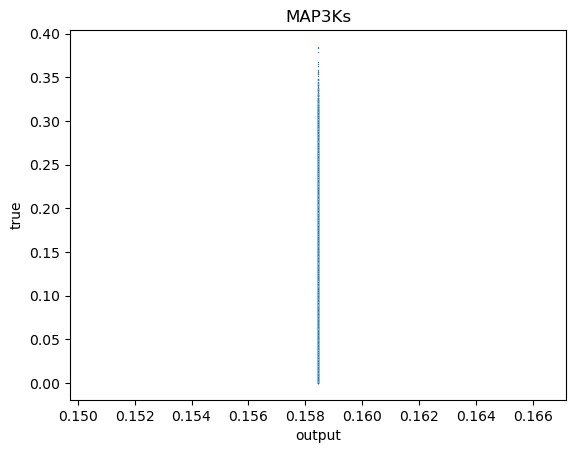

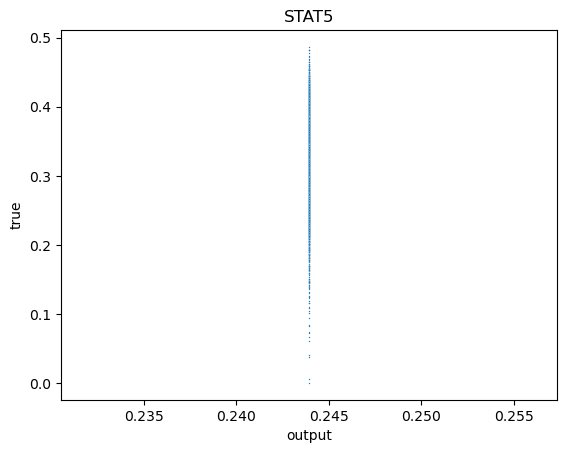

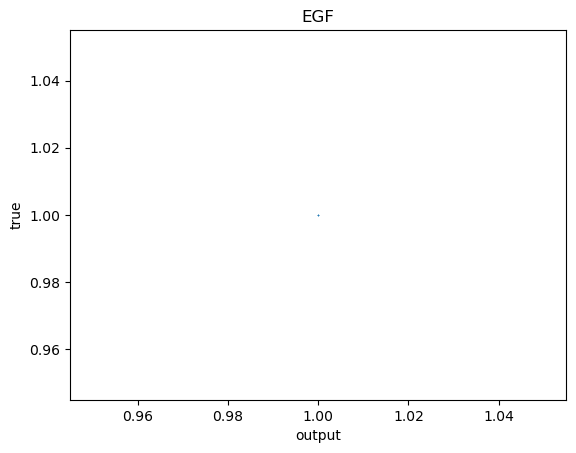

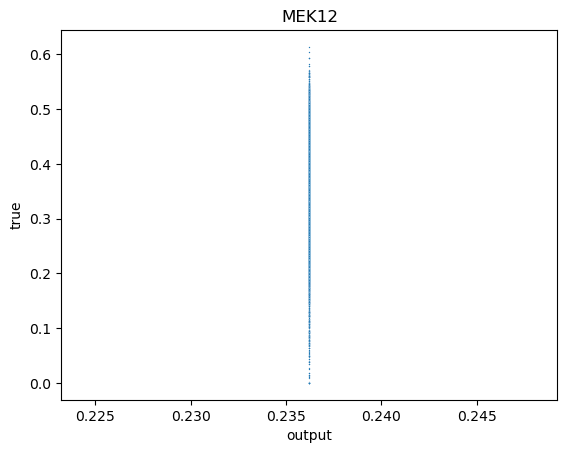

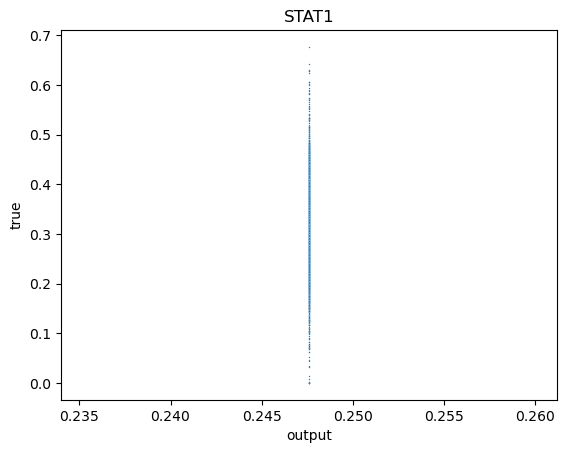

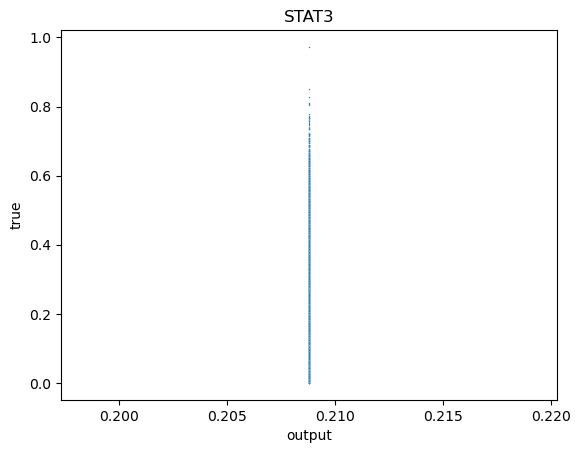

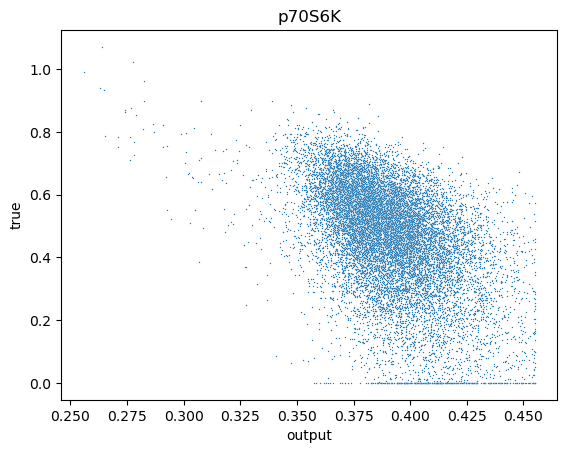

In [34]:
for m in output.columns:
    if m in valid.columns:
        sns.scatterplot(x=output[m], y=valid[m].reset_index(drop=True), s=1)
        plt.xlabel("output")
        plt.ylabel("true")
        plt.title(m)
        plt.show()

<AxesSubplot:>

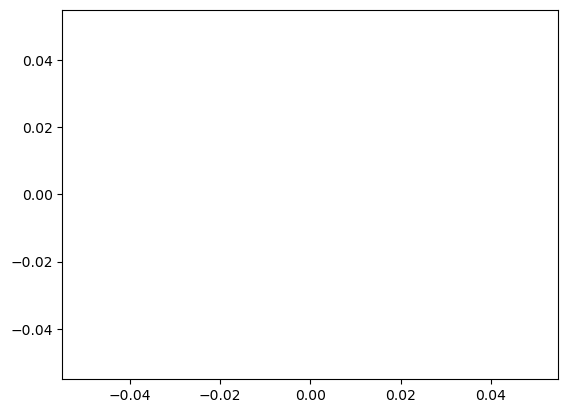

In [31]:
sns.scatterplot(x=output[m], y=valid[m])

In [29]:
output[m]

0        0.393470
1        0.374041
2        0.423288
3        0.385841
4        0.382370
           ...   
14483    0.410672
14484    0.404942
14485    0.368482
14486    0.430563
14487    0.384685
Name: p70S6K, Length: 14488, dtype: float64

In [30]:
valid[m]

179768    0.478942
252713    0.595751
305981    0.446476
182437    0.541785
250135    0.347166
            ...   
242809    0.316168
438235    0.000000
248873    0.572026
183980    0.386461
306714    0.286193
Name: p70S6K, Length: 14488, dtype: float64